In [3]:
from skmob.models.epr import Ditras

In [4]:
from skmob.models.markov_diary_generator import MarkovDiaryGenerator
from skmob.preprocessing import filtering, compression, detection, clustering

In [5]:
tdf = skmob.TrajDataFrame.from_file('./data/geolife_sample.txt.gz', 
                                     latitude='lat', longitude='lon', user_id='user', 
                                     datetime='datetime', sep=',')
ctdf = compression.compress(tdf)
stdf = detection.stops(ctdf)
cstdf = clustering.cluster(stdf)
cstdf[:5]

,lat,lng,datetime,uid,leaving_datetime,cluster
0,39.978253,116.327275,2008-10-23 06:01:05,1,2008-10-23 10:32:53,0
1,40.013819,116.306532,2008-10-23 11:10:09,1,2008-10-23 23:46:02,1
2,39.978987,116.326686,2008-10-24 00:10:39,1,2008-10-24 01:48:57,0
3,39.981316,116.310181,2008-10-24 01:56:47,1,2008-10-24 03:21:09,7
4,39.979580,116.313649,2008-10-24 03:26:35,1,2008-10-24 03:50:36,42


In [6]:
mdg = MarkovDiaryGenerator()
mdg.fit(cstdf, 2, lid='cluster')
    

100%|██████████| 2/2 [00:00<00:00,  2.38it/s]


In [7]:
start_time = pd.to_datetime('2019/01/01 08:00:00')
end_time = pd.to_datetime('2019/01/14 08:00:00')
depr = Ditras(mdg)

In [8]:
tdf = depr.generate(start_time, end_time, tessellation, relevance_column='population',
                    n_agents=3, od_matrix=None, verbose=True)

  0%|          | 0/3 [00:00<?, ?it/s]/Users/fs13378/sda3/projects/scikit_mobility/skmob/models/collective.py:47: RuntimeWarning: divide by zero encountered in power
  return np.power(x, exponent)
100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


## depr

<img src="../logo_skmob.png" width=250 align="left"/>

# Trajectory models

Generative models of individual trajectories.

- [Density EPR](#Density-EPR)

In [4]:
import skmob
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Exploration and Preferential Return EPR

### Density EPR

In [2]:
from skmob.models.epr import DensityEPR

In [5]:
tessellation = gpd.GeoDataFrame.from_file("data/NY_counties_2011.geojson")
start_time = pd.to_datetime('2019/01/01 08:00:00')
end_time = pd.to_datetime('2019/01/14 08:00:00')

In [6]:
depr = DensityEPR()

In [7]:
tdf = depr.generate(start_time, end_time, tessellation, relevance_column='population',
                    n_agents=3, od_matrix=None, verbose=True)

  0%|          | 0/3 [00:00<?, ?it/s]/Users/fs13378/sda3/projects/scikit_mobility/skmob/models/gravity.py:44: RuntimeWarning: divide by zero encountered in power
  return np.power(x, exponent)
100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


In [13]:
tdf.parameters

{'model': {'class': <function skmob.models.epr.DensityEPR.__init__(self, name='Density EPR model')>,
  'generate': {'start_date': Timestamp('2019-01-01 08:00:00'),
   'end_date': Timestamp('2019-01-14 08:00:00'),
   'gravity_singly': {},
   'n_agents': 3,
   'relevance_column': 'population',
   'random_state': None,
   'verbose': True}}}

In [14]:
tdf.head()

,uid,datetime,lat,lng
0,1,2019-01-01 08:00:00.000000,43.172182,-74.942543
1,1,2019-01-01 08:33:18.538452,43.151007,-76.097049
2,1,2019-01-01 08:56:20.866027,43.172182,-74.942543
3,1,2019-01-01 09:50:06.997880,43.151007,-76.097049
4,1,2019-01-01 15:49:40.733683,43.246222,-76.130627


In [8]:
from skmob.preprocessing import detection, clustering
dtdf = detection.stops(tdf)
ctdf = clustering.cluster(dtdf)

In [11]:
uid = 2
m = tdf[tdf['uid'] == uid].plot_trajectory(zoom=7)
ctdf[ctdf['uid'] == uid].plot_stops(map_f=m)

/Users/fs13378/miniconda3/envs/skmob/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


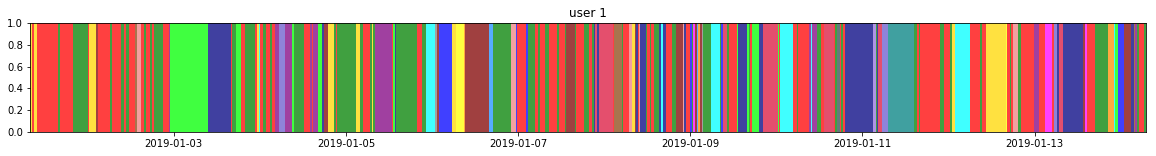

In [12]:
ctdf.plot_diary(user=1)

In [15]:
from skmob.measures.individual import jump_lengths, radius_of_gyration, waiting_times

In [16]:
jls_df = jump_lengths(tdf)
jls_df.head()

100%|██████████| 3/3 [00:00<00:00, 75.22it/s]


,uid,jump_lengths
0,1,"[93.66925735660512, 93.66925735660512, 93.6692..."
1,2,"[0.0, 35.38309136009826, 35.278879097397784, 7..."
2,3,"[0.0, 0.0, 0.0, 160.36611536468257, 160.366115..."


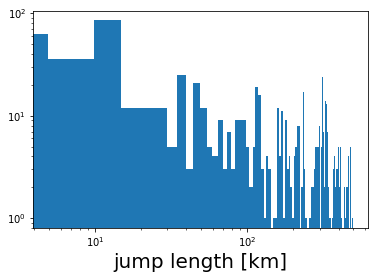

In [17]:
jls = []
for x in jls_df.jump_lengths:
    jls.extend(x)

plt.hist(jls, bins=100)
plt.xlabel('jump length [km]', fontsize=20)
plt.loglog()
plt.show()

In [18]:
wts_df = waiting_times(tdf)
wts_df.head()

100%|██████████| 3/3 [00:00<00:00, 147.64it/s]


,uid,waiting_times
0,1,"[1998.0, 1382.0, 3226.0, 21573.0, 1778.0, 3213..."
1,2,"[1697.0, 6383.0, 2125.0, 1411.0, 44272.0, 2498..."
2,3,"[3170.0, 1712.0, 3338.0, 3175.0, 2998.0, 2779...."


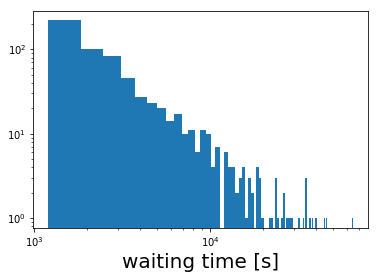

In [19]:
wts = []
for x in wts_df.waiting_times:
    wts.extend(x)

plt.hist(wts, bins=100)
plt.xlabel('waiting time [s]', fontsize=20)
plt.loglog()
plt.show()

100%|██████████| 3/3 [00:00<00:00, 98.97it/s]


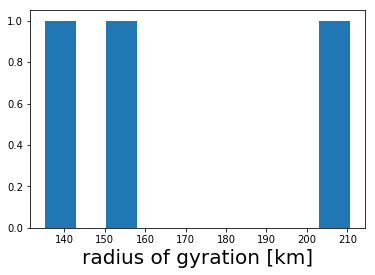

In [20]:
rg_df = radius_of_gyration(tdf)
plt.hist(rg_df.radius_of_gyration.values, bins=10)
plt.xlabel('radius of gyration [km]', fontsize=20)
plt.show()